In [29]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv("human.csv")

In [31]:
datamini = dataset[["bmi","charges"]]

In [32]:
zdatamini = np.abs(stats.zscore(datamini))

In [33]:
zdatamini

,bmi,charges
0,0.453320,0.298584
1,0.509621,0.953689
2,0.383307,0.728675
3,1.305531,0.719843
4,0.292556,0.776802
...,...,...
1333,0.050297,0.220551
1334,0.206139,0.914002
1335,1.014878,0.961596
1336,0.797813,0.930362


In [34]:
newdatamini_clean = datamini[(zdatamini<3).all(axis=1)]
newdatamini_clean.shape

(1327, 2)

In [35]:
q1 = datamini.quantile(q=.25)
q3 = datamini.quantile(q=.75)
IQR = datamini.apply(stats.iqr)

<h2>DATA SEPARATION</h2>

In [36]:
newdataclean1 = datamini[~((datamini < (q1-1.5*IQR)) | (datamini > (q3+1.5*IQR))).any(axis=1)]

In [37]:
outlier1 = datamini[((datamini < (q1-1.5*IQR)) | (datamini > (q3+1.5*IQR))).any(axis=1)]

In [38]:
print(newdataclean1.shape)
print(outlier1.shape)

(1193, 2)
(145, 2)


<h2>MEDIAN</h2>

In [39]:
med = dataset.median()
med

C:\Users\devde\AppData\Local\Temp\ipykernel_22248\659635260.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = dataset.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

<h2>BOX PLOTS</h2>

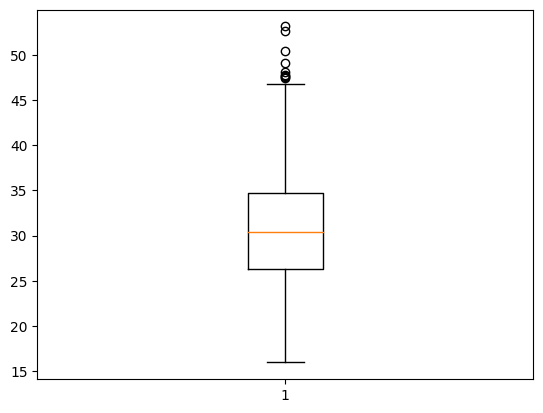

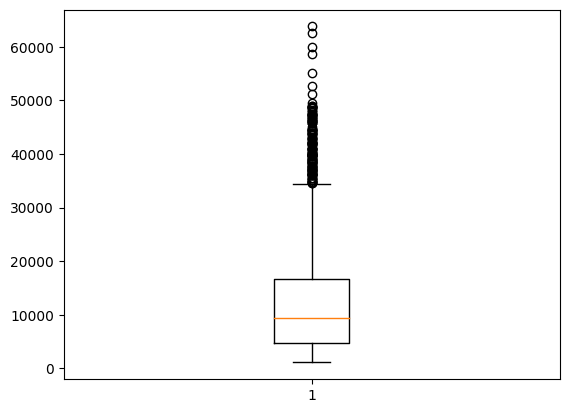

In [40]:
plt.boxplot(dataset["bmi"])
plt.show()
plt.boxplot(dataset["charges"])
plt.show()

<h2>CHANGING WITH MEDIAN</h2>

In [41]:
outliernew = outlier1
mednew = med

print(outliernew)
print(mednew)

outliernew["bmi"] = mednew["bmi"]
outliernew["charges"] = mednew["charges"]

         bmi      charges
14    42.130  39611.75770
19    35.300  36837.46700
23    31.920  37701.87680
29    36.300  38711.00000
30    35.600  35585.57600
...      ...          ...
1301  30.875  46718.16325
1303  27.800  37829.72420
1313  34.700  36397.57600
1317  53.130   1163.46270
1323  40.370  43896.37630

[145 rows x 2 columns]
age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64


C:\Users\devde\AppData\Local\Temp\ipykernel_22248\570120464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliernew["bmi"] = mednew["bmi"]
C:\Users\devde\AppData\Local\Temp\ipykernel_22248\570120464.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliernew["charges"] = mednew["charges"]


In [42]:
print(outliernew)

       bmi   charges
14    30.4  9382.033
19    30.4  9382.033
23    30.4  9382.033
29    30.4  9382.033
30    30.4  9382.033
...    ...       ...
1301  30.4  9382.033
1303  30.4  9382.033
1313  30.4  9382.033
1317  30.4  9382.033
1323  30.4  9382.033

[145 rows x 2 columns]


<h1>By Devdeepsinh Zala</h1>
<h4>20BCM015</h4>